In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
data= pd.read_csv('credit_train.csv')

In [121]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [122]:
data.shape

(100514, 19)

## variable analysis

let us see datatypes of each variables

In [123]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

for model prediction  there are no use of Loan ID and Customer ID ,but if you talk about insight  then  both columns are mandetory to search out detail about customer id or loan id.

so, for now we have not delete both upper columns.

In [124]:
data['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

in loan status , here fully paid means the person who take debt has been paid all debt by the time.
and in charged off means the person or coustomer who take loan has not been able to take pay his debt since long time .
 so creditor has labled this type of customer id  as charged off and send data to collecting agency.
 
this information is very necessery in prediction or take any decision . so we can not alter or change this columns.

 Loan status is dependent variable and rest all are independent.


In [125]:
# around 30% of loan customer labeled as charged off or unable to pay their loan.

## univarient  analysis and missing value

In [126]:
data['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

there are two types of loan offered by creditor , first short term means loan paid or will pay within short duration.
and second long term means load paid or will pay within long term.

In [127]:
# around 30% loan term are long term rest are short term.

In [128]:
data['Credit Score'].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [129]:
# there is no loan for whose credit score below 585.

Credit score - the score on which bank decide ,which customer is loyal to pay their loan within appropriate time duration . this score given by analyst on the basic of customer transation,credit,balance or history of customer.

credit score never be more than 900 . any number which is more than 900 is human error so we should correct it by dividing 10 on it.

In [130]:
data['Credit Score'] = np.where(data['Credit Score']>900 , data['Credit Score']/10,data['Credit Score'])

In [131]:
data['Credit Score'].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [132]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [133]:
data['Annual Income'].value_counts()

1162572.0    22
973370.0     19
969475.0     18
1140000.0    18
949905.0     17
             ..
552558.0      1
610033.0      1
775010.0      1
992997.0      1
1289416.0     1
Name: Annual Income, Length: 36174, dtype: int64

In [134]:
data['Annual Income'].describe()

count    8.084600e+04
mean     1.378277e+06
std      1.081360e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174162e+06
75%      1.650663e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [64]:
data['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [135]:
#  10+ year in current job can easly get loan.

In [65]:
data['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [138]:
# max customer who get loan  are either  home mortgage or  rent as  their home Ownership, 

In [66]:
data['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [139]:
# 78% customer  get load for purpose of Debt Consolidation.

In [67]:
data['Purpose']=data['Purpose'].map({'Debt Consolidation':'Debt Consolidation',
                                     'other':'Other',
                                     'Home Improvements':'Home Improvements',
                                      'Other': 'Other',
                                     'Business Loan':'Business Loan',
                                      'Buy a Car':'Buy a Car',
                                      'Medical Bills':'Medical Bills',
                                       'Buy House':'Buy House',
                                       'Take a Trip':'Take a Trip',
                                       'major_purchase':'major_purchase',
                                        'small_business': 'small_business',
                                        'moving':'moving',
                                        'wedding':'wedding',
                                        'vacation':'vacation',
                                        'Educational Expenses': 'Educational Expenses',
                                        'renewable_energy':'renewable_energy'})

In [68]:
data['Purpose'].value_counts()

Debt Consolidation      78552
Other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [69]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [70]:
data['Years of Credit History'].value_counts()

16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
3.6        1
70.5       1
52.6       1
52.3       1
51.4       1
Name: Years of Credit History, Length: 506, dtype: int64

In [71]:
data['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [72]:
data['Tax Liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

Tax Liens-If anyone fail to repay the mortgage the bank has the legal rights to seal their property. Tax liens are the liens created by law. The law often allows tax authorities to put liens on properties of taxpayers who do not pay the taxes on time.
 
 any null value which is occur in Bankruptcies and Tax LInes  will not be imputed with another center number like mean,median,mode.

In [73]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [141]:
# there are 718 Bankruptcies and 524 Tax liens which is around .7 and .5 percentage respectively.

 first of all we delete 514 rows from all data.                                                       
 and then delete  Months since last delinquent columns because there are more than 50% values are missing or null.


In [74]:
data.dropna(axis=0,subset='Loan Status',inplace=True)

In [75]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [76]:
data.drop(labels='Months since last delinquent',axis=1,inplace=True)

In [77]:
data.isnull().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

So we will prefer here to replace missing values by Random Number fron the Respective column.That will help us to keep the Distribution in original form.So lets Check Summary for these column before and after Imputation.

We tried interpolation here because we dont want to replace missing values by mean or median .Reason is that if you do that it will affect your distribution of data.So we want to handle data as well as maintain the distribution in line for modelling purporse.

In [79]:
data['Years in current job']

0          8 years
1        10+ years
2          8 years
3          3 years
4          5 years
           ...    
99995      7 years
99996       1 year
99997      6 years
99998      9 years
99999          NaN
Name: Years in current job, Length: 100000, dtype: object

In [80]:
data.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

So we will prefer here to replace missing values by Random Number fron the Respective column.That will help us to keep the Distribution in original form.So lets Check Summary for these column before and after Imputation.

We tried interpolation here because we dont want to replace missing values by mean or median .Reason is that if you do that it will affect your distribution of data.So we want to handle data as well as maintain the distribution in line for modelling purporse.

In [81]:
data.dropna(axis=0,subset='Bankruptcies',inplace=True)

In [82]:
data.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19112
Annual Income                19112
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [83]:
cred=data['Credit Score']

In [84]:
ser=pd.Series(cred)

In [85]:
ser

0        709.0
1          NaN
2        741.0
3        721.0
4          NaN
         ...  
99995    725.0
99996    732.0
99997    742.0
99998    746.0
99999    743.0
Name: Credit Score, Length: 99796, dtype: float64

In [86]:
data['credit score']=ser.interpolate()

In [87]:
data['credit score']

0        709.0
1        725.0
2        741.0
3        721.0
4        725.0
         ...  
99995    725.0
99996    732.0
99997    742.0
99998    746.0
99999    743.0
Name: credit score, Length: 99796, dtype: float64

In [88]:
ann=pd.Series(data['Annual Income'])

In [89]:
ann

0        1167493.0
1              NaN
2        2231892.0
3         806949.0
4              NaN
           ...    
99995     475437.0
99996    1289416.0
99997    1150545.0
99998    1717524.0
99999     935180.0
Name: Annual Income, Length: 99796, dtype: float64

In [90]:
data['annual income']=ann.interpolate()

In [91]:
data['annual income']

0        1167493.0
1        1699692.5
2        2231892.0
3         806949.0
4         851903.0
           ...    
99995     475437.0
99996    1289416.0
99997    1150545.0
99998    1717524.0
99999     935180.0
Name: annual income, Length: 99796, dtype: float64

In [92]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,credit score,annual income
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.0,1167493.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,725.0,1699692.5
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0,2231892.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.0,806949.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,725.0,851903.0


In [93]:
del(data['Credit Score'])

In [94]:
del(data['Annual Income'])

In [95]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,credit score,annual income
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.0,1167493.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,725.0,1699692.5
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0,2231892.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.0,806949.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,725.0,851903.0


In [96]:
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Years in current job         4222
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             2
Bankruptcies                    0
Tax Liens                       0
credit score                    0
annual income                   0
dtype: int64

In [97]:
data[['Years in current job','credit score']]

,Years in current job,credit score
0,8 years,709.0
1,10+ years,725.0
2,8 years,741.0
3,3 years,721.0
4,5 years,725.0
...,...,...
99995,7 years,725.0
99996,1 year,732.0
99997,6 years,742.0
99998,9 years,746.0


In [98]:
data.head(100)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,credit score,annual income
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.000000,1.167493e+06
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,725.000000,1.699692e+06
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.000000,2.231892e+06
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.000000,8.069490e+05
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,725.000000,8.519030e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ed6b4f20-6897-44b9-b36c-834f5f371853,bc653e0d-ccac-4114-b998-f53c9f2dffc8,Fully Paid,432080.0,Short Term,10+ years,Rent,Debt Consolidation,35360.14,17.9,22.0,0.0,160550.0,685982.0,0.0,0.0,736.666667,6.810993e+05
96,4cfa482a-57c2-4856-ab26-a8af32adaa3f,403bdb3c-e326-4172-9f81-4e6b992cc349,Fully Paid,158818.0,Short Term,NaN,Own Home,Debt Consolidation,8522.83,31.3,13.0,2.0,260072.0,756646.0,0.0,2.0,731.000000,3.156660e+05
97,87260afa-a95d-4507-9db0-c8eeb5db5aef,168cc347-945f-43d4-827b-1c06c7a80722,Charged Off,78738.0,Short Term,2 years,Rent,Other,14034.92,10.5,14.0,0.0,138586.0,266112.0,0.0,0.0,624.000000,5.363700e+05
98,10da47ac-d3ce-461c-bf95-1b9d0cac176f,d110ff2c-c936-487a-8e4f-8a192bad9cd8,Fully Paid,453464.0,Short Term,3 years,Rent,Debt Consolidation,17007.85,14.2,12.0,1.0,137845.0,222926.0,1.0,0.0,712.000000,8.951470e+05


from above we can replace null value of the columna with 10+ year because of the credit score is 700+  in the same row of nan value in Years in current job . it might be possible that person not wish to disclose their annual salary.

In [99]:
data['Years in current job']=data['Years in current job'].fillna('10+ years')

In [100]:
data['Years in current job'].value_counts()

10+ years    35313
2 years       9105
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

In [106]:
data.dropna(axis=0,subset='Maximum Open Credit',inplace=True)

In [109]:
data.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
credit score                 0
annual income                0
dtype: int64

In [142]:
## corelation analysis

<AxesSubplot:>

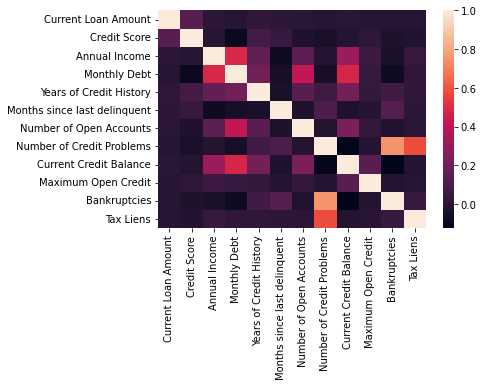

In [143]:
sns.heatmap(data.corr())

## conclusion 

1-there are 718 Bankruptcies and 524 Tax liens which is around 0.7 and 0.5 percentage respectively.

2-78% customer  get load for purpose of Debt Consolidation.

3-max customer who get loan  are either  home mortgage or  rent as  their home Ownership, 

4- customer who 10+ year in current job can easly get loan.

5-there is no loan for whose credit score below 585.

6-around 30% loan term are long term rest are short term.

7-around 30% of loan customer labeled as charged off or unable to pay their loan.

8- positive relation between Number of Credit Problems with Tax liens and Bankruptcies.

9-lighter corelation between current credit balance with monthly debt.

10- some positive relation between Monthly debit with Annual income.